In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from scipy.stats import uniform

In [4]:
NUM_LABEL_COLS = 13
df = pd.read_pickle('./data/5s/labeled/features_r02/all_data.pkl')

In [5]:
df_filtered = df
df_filtered.shape

(9080, 10790)

In [6]:
# exclude records we want to exclude
df_filtered = df_filtered[df_filtered['sop'] == '0']
df_filtered = df_filtered[df_filtered['bari'] == '0']
df_filtered = df_filtered[df_filtered['clrt'] == '0']
df_filtered = df_filtered[df_filtered['othr'] == '0']
df_filtered = df_filtered[df_filtered['trmp'] == '0']
df_filtered = df_filtered[df_filtered['trmb'] == '0']
df_filtered = df_filtered[df_filtered['otrb'] == '0']

num_x_cols = df_filtered.shape[1] - NUM_LABEL_COLS - 1  
# ^ last bit to adjust for zero indexing
data = df_filtered.iloc[:, 1:num_x_cols].to_numpy() 
# ^ These are the features
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

# Create target column
combined = df_filtered[['tenr']].to_numpy() + df_filtered[['alto']].to_numpy() + df_filtered[['tora']].to_numpy()
combined = combined.astype('int')
combined[combined > 0] = 1
df_filtered['tenor/alto'] = combined

target = df_filtered[['tenor/alto']].to_numpy().ravel()  # << This is the label

print(data.shape)
print(target.shape)

(7368, 10775)
(7368,)


In [7]:
xs = [n for n in range(4, 60, 1)]
ys = []
for x in xs:
    pca = PCA(n_components=x)
    pca.fit(data)
    d = pca.transform(data)
    x_train, x_test, y_train, y_test = \
         train_test_split(d, target, test_size=0.20, random_state=0)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ys.append(clf.score(x_test, y_test))
    

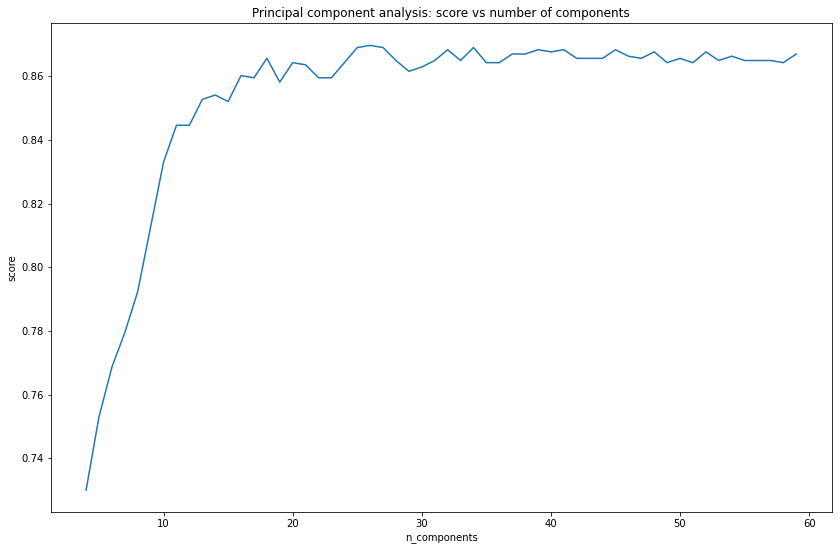

In [8]:
fig = plt.figure(figsize=(14, 9))    
plt.plot(xs, ys)
plt.xlabel('n_components')
plt.ylabel('score')
plt.title("Principal component analysis: score vs number of components")
pass


In [9]:
pca = PCA()
pca.fit(data)

PCA()

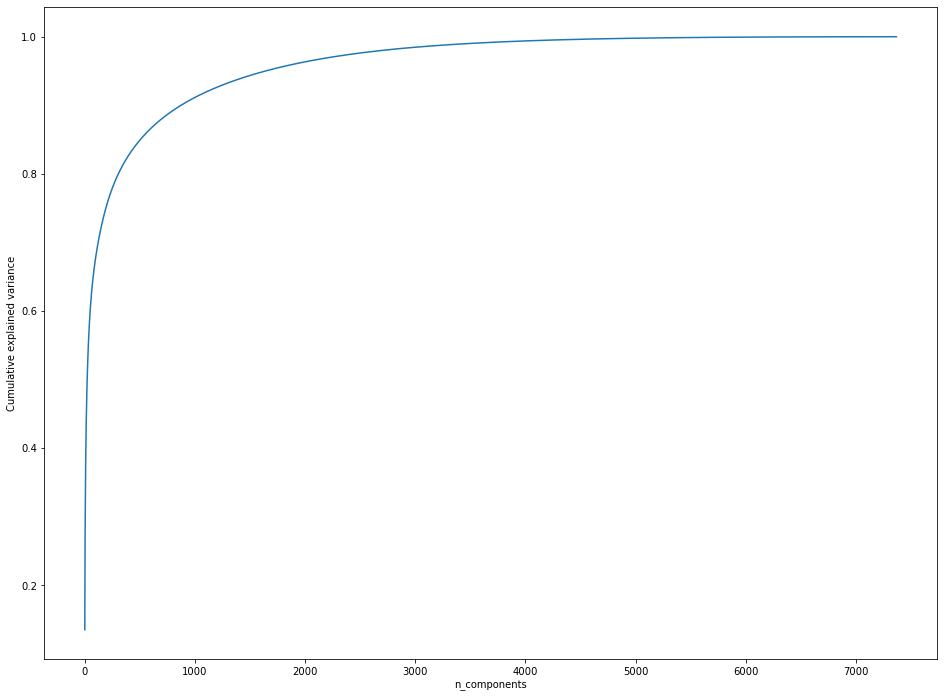

In [10]:
fig = plt.figure(figsize=(16, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance');

In [11]:
pca = PCA(0.5).fit(data)
pca.n_components_

23

In [12]:
pca = PCA(0.51).fit(data)
pca.n_components_

25

In [13]:
pca = PCA(0.515).fit(data)
pca.n_components_

25